In [21]:
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import CARTODBPOSITRON, get_provider
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [24]:
crs = {'init':'epsg:4326'}

In [2]:
df = pd.read_csv(r'../../Machine Learning/Data Incubator/Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\Lenovo\Anaconda3\envs\cs231n\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/27/2018,14:50,BROOKLYN,11207,40.683730,-73.890450,POINT (-73.89045 40.68373),NaN,NaN,341 HIGHLAND BOULEVARD,...,Unspecified,NaN,NaN,NaN,4047436,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,11/27/2018,21:30,QUEENS,11378,40.729343,-73.902626,POINT (-73.902626 40.729343),63 STREET,53 DRIVE,NaN,...,NaN,NaN,NaN,NaN,4033942,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2,11/28/2018,14:30,NaN,NaN,40.680313,-73.842026,POINT (-73.842026 40.680313),ROCKAWAY BOULEVARD,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4034329,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
3,11/26/2018,16:22,NaN,NaN,40.766340,-73.894165,POINT (-73.894165 40.76634),GRAND CENTRAL PKWY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4033186,Sedan,Sedan,NaN,NaN,NaN
4,11/26/2018,23:17,NaN,NaN,40.767117,-73.956505,POINT (-73.956505 40.767117),EAST 71 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4033381,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697567,07/01/2012,21:10,NaN,NaN,NaN,NaN,NaN,HOR HARDING EXPRESSWAY SR SOUTH,108 STREET,NaN,...,Unspecified,NaN,NaN,NaN,264080,AMBULANCE,PASSENGER VEHICLE,NaN,NaN,NaN
1697568,07/01/2012,8:37,QUEENS,11435,40.694545,-73.802112,POINT (-73.802112 40.6945453),SOUTH ROAD,SUTPHIN BOULEVARD,NaN,...,NaN,NaN,NaN,NaN,208724,UNKNOWN,NaN,NaN,NaN,NaN
1697569,07/01/2012,9:15,QUEENS,11429,40.711860,-73.735538,POINT (-73.7355383 40.7118601),219 STREET,104 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,219394,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
1697570,07/01/2012,9:40,MANHATTAN,10002,40.714069,-73.997504,POINT (-73.9975038 40.7140687),DIVISION STREET,CATHERINE STREET,NaN,...,Driver Inexperience,NaN,NaN,NaN,5294,PASSENGER VEHICLE,LIVERY VEHICLE,NaN,NaN,NaN


In [28]:
# To start with, Looking only on leathal accidents with fatalaties

In [40]:
df = df[(df['NUMBER OF PERSONS KILLED'] > 1)].reset_index(drop=True)

In [43]:
df.dropna(axis=1, how='all')

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
0,05/01/2018,14:51,NaN,NaN,40.601734,-73.935036,POINT (-73.935036 40.601734),AVENUE U,GERRITSEN AVENUE,NaN,...,Unspecified,Unspecified,Unspecified,3892146,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,POINT (-73.93504 40.60173)
1,12/27/2016,5:41,NaN,NaN,40.844604,-73.903480,POINT (-73.90348 40.844604),CROSS BRONX EXPY,NaN,NaN,...,Unspecified,Unspecified,NaN,3588439,Tractor Truck Diesel,Sedan,Tractor Truck Diesel,Pick-up Truck,NaN,POINT (-73.90348 40.84460)
2,06/21/2020,21:23,NaN,NaN,NaN,NaN,NaN,CITY ISLAND ROAD,NaN,NaN,...,Unspecified,Unspecified,Unspecified,4322266,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,POINT (nan nan)
3,06/11/2020,1:34,NaN,NaN,NaN,NaN,NaN,BRONX RIVER PARKWAY RAMP,NaN,NaN,...,NaN,NaN,NaN,4319230,Sedan,NaN,NaN,NaN,NaN,POINT (nan nan)
4,07/11/2020,20:18,BROOKLYN,11234,40.589930,-73.900590,POINT (-73.90059 40.58993),NaN,NaN,3159 FLATBUSH AVENUE,...,NaN,NaN,NaN,4327676,Sedan,Sedan,NaN,NaN,NaN,POINT (-73.90059 40.58993)
5,07/20/2020,23:46,NaN,NaN,40.835087,-73.825380,POINT (-73.82538 40.835087),BRUCKNER EXPRESSWAY,NaN,NaN,...,Unspecified,Unspecified,Unspecified,4330670,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,POINT (-73.82538 40.83509)
6,04/26/2020,3:35,NaN,NaN,40.811428,-73.900910,POINT (-73.90091 40.811428),BRUCKNER BOULEVARD,NaN,NaN,...,NaN,NaN,NaN,4310365,Sedan,NaN,NaN,NaN,NaN,POINT (-73.90091 40.81143)
7,01/25/2020,5:35,NaN,NaN,40.748398,-73.728790,POINT (-73.72879 40.748398),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,4278634,Sedan,Sedan,NaN,NaN,NaN,POINT (-73.72879 40.74840)
8,10/04/2019,18:45,NaN,NaN,40.825283,-73.886480,POINT (-73.88648 40.825283),WHITLOCK AVENUE,NaN,NaN,...,NaN,NaN,NaN,4218016,Sedan,NaN,NaN,NaN,NaN,POINT (-73.88648 40.82528)
9,08/11/2019,3:45,NaN,NaN,40.798060,-73.975540,POINT (-73.97554 40.79806),HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,NaN,4187133,Sedan,NaN,NaN,NaN,NaN,POINT (-73.97554 40.79806)


In [7]:
%matplotlib inline

In [9]:
streat_map = gdp.read_file('NYC_shapefile/CHS_2009_DOHMH_2010B.shp')

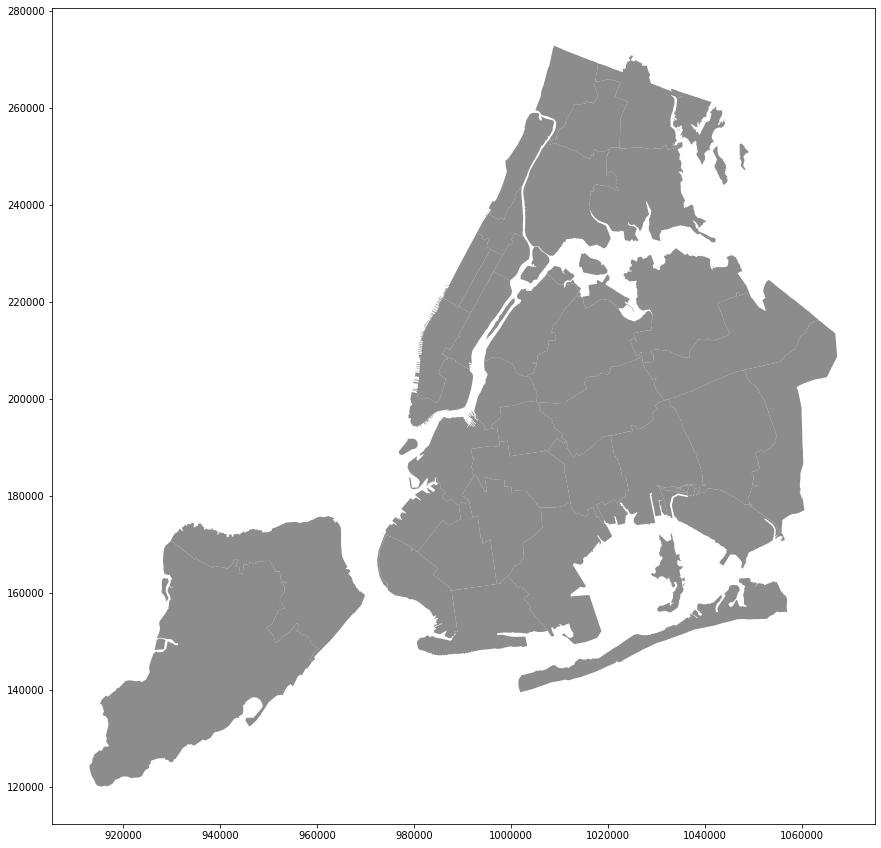

In [16]:
fig, ax = plt.subplots(figsize = (15,15))
streat_map.plot(ax = ax, alpha = .9, color = 'grey')

In [18]:
# Place on map locations of accidents

In [32]:
geo = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]

In [35]:
geo_df = gdp.GeoDataFrame(df, geometry = geo)

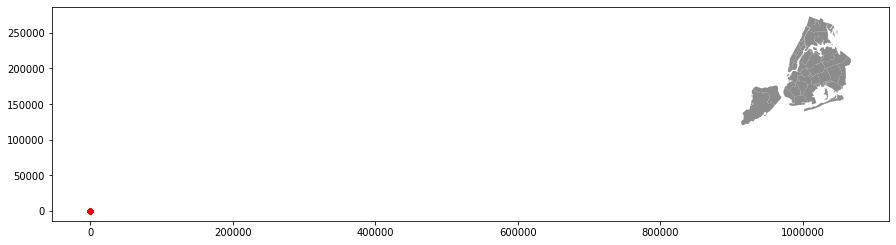

In [36]:
fig, ax = plt.subplots(figsize = (15,15))
streat_map.plot(ax = ax, alpha = .9, color = 'grey')
geo_df.plot(ax = ax, markersize = 20, color = 'red', marker = 'o')